# Decision Tree
# Aditya Bagad

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### About dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

### Reading the dataset

In [2]:
dataFrame = pd.read_csv('drug_dataset.csv')

In [3]:
dataFrame.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
dataFrame.shape

(200, 6)

### Splitting into features and lables

In [5]:
# Features
X = dataFrame.iloc[:, :-1]

In [6]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
y = dataFrame.iloc[:, -1]

In [8]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Pre-processing the data

In [9]:
from sklearn import preprocessing

In [10]:
# Label Encoder for Sex

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X['Sex'] = le_sex.transform(X['Sex']) 

In [11]:
# Label Encoder for BP

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X['BP'] = le_BP.transform(X['BP'])

In [12]:
# Label Encoder for Cholesterol

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X['Cholesterol'] = le_Chol.transform(X['Cholesterol'])

In [13]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


### Splitting the data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [15]:
X_train.shape, X_test.shape

((160, 5), (40, 5))

In [16]:
y_train.shape, y_test.shape

((160,), (40,))

### Modeling

In [17]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [18]:
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions

In [19]:
y_pred = decisionTree.predict(X_test)

### Evaluation

In [20]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.95


### Tree Visualization

In [21]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [22]:
dot_data = StringIO()

filename = 'DecisionTree.png'

In [23]:
featureNames = X.columns

targetNames = dataFrame['Drug'].unique().tolist()

In [24]:
out=tree.export_graphviz(decisionTree,
                         feature_names = featureNames,
                         out_file = dot_data, 
                         class_names = np.unique(y_train), 
                         filled=True,  
                         special_characters=True,
                         rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(filename)

True

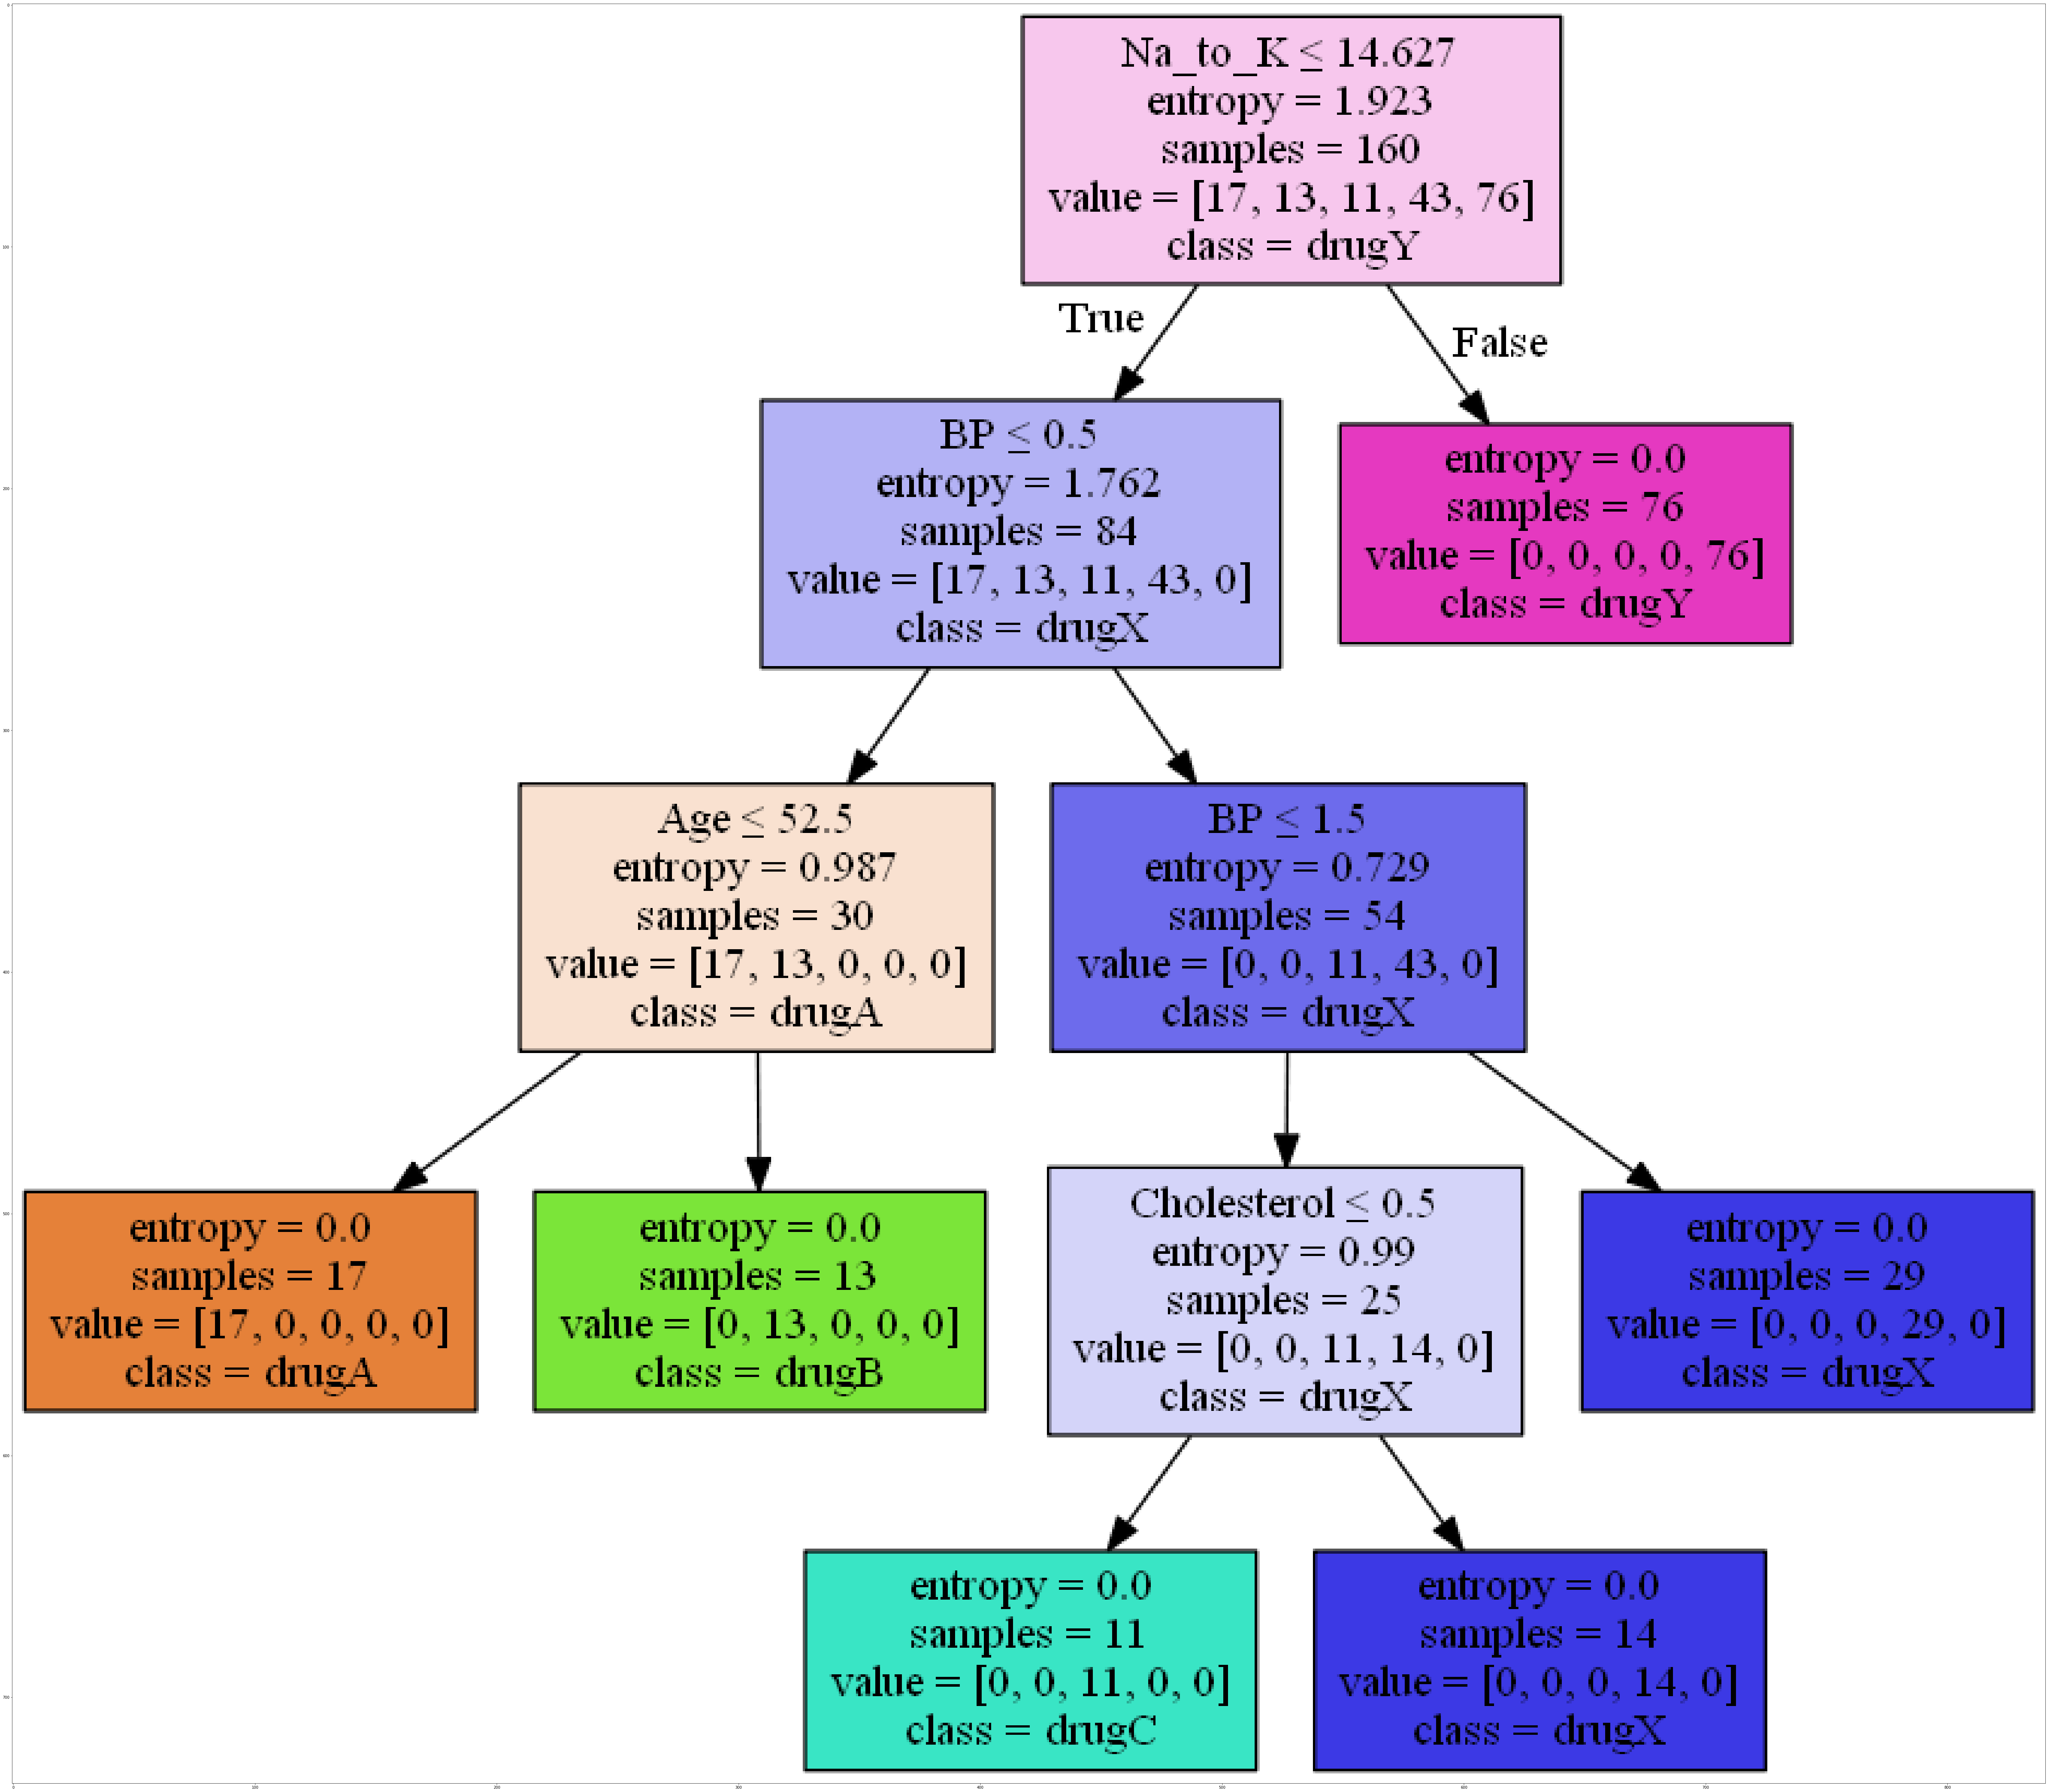

In [25]:
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')